# 분류의 성능 평가 지표(Evaluation Metric)

- 정확도(accuracy)
- 오차행렬(confusion matrix)
- 정밀도(precision)
- 재현율(recall)
- F1 score
- ROC/AUC

In [ ]:
- 이진 분류, 멀티 분류 모두에 적용되지만 특히 '이진 분류'에서 더 중요!

# 정확도(accuracy)
#실제 데이터에서 예측 데이터가 얼마나 같은지? (y_test와 pred가 얼마나 겹치는지?)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('01/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#데이터 전처리 함수를 만들어보자

#결측값 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#불필요 컬럼 제거
def drop(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)
    return df

#레이블 인코딩
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

#앞의 데이터 전처리 함수 모두 모은 함수 정의('transform_features')
def transform_features(df):
    df=fillna(df)
    df=drop(df)
    df=label_encoding(df)
    return df

In [4]:
new_df=transform_features(data)
new_df.head() #전처리 완료!

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


In [5]:
new_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [6]:
y_df=new_df['Survived']
X_df=new_df.drop(['Survived'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, test_size=0.2, random_state=0) #순서주의! x 다음 y 순서로 쪼개야함!

In [7]:
#단순히 성별(sex)이 1이면 0(사망), 아니면 1(생존)으로 예측하는 분류모델을 만들어보자.
from sklearn.base import BaseEstimator ##BaseEstimator를 사용하면 직접 우리가 ML 모델을 만들 수 있다.
import numpy as np

#'MyDummyClassifer()' 또한 하나의 분류 ML 모델이라고 생각.
class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None): #X_train, y_train 셋을 넣음
        pass #fit을 시켜봤자 학습 안시키고 넘어감
    def predict(self, X): #predict의 경우, 성별이 1이면 0, 아니면 1로 예측해버림 #X_test 셋을 넣음
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred
    

In [8]:
#객체
myclf=MyDummyClassifier()
#학습
myclf.fit(X_train, y_train)

In [9]:
#예측
pred=myclf.predict(X_test) 
#평가-정확도
accuracy_score(y_test,pred) #그저 성별에 따라서 막 짠 분류모델인데도 정확도가 78%임.. 

#그러니 정확도(accuracy)만을 평가지표로 삼기엔 무리!

0.7877094972067039

In [10]:
#MNIST 데이터를 이용해 7과 7이 아닌 데이터셋으로 이진 분류를 해보자.
##역시 위의 'MyDummyClassifier'처럼, 그냥 전부 0으로 예측해버리는 분류모델을 쓰겠음

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [11]:
digits=load_digits()

In [12]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [19]:
pd.DataFrame(digits.target).head(10)

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [17]:
(digits.target==7).astype(int)
#(digits.target==7) : boolean
#(digits.target==7).astype(int) : int(7인 것만 1, 아닌 것은 0)

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
y=(digits.target==7).astype(int) #7은 1, 나머지는 0 변환
pd.DataFrame(y).head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [25]:
#digit 번호가 7번이면 True고 이를 astype(int)로 1로 변환. 그 외 0(False)
y=(digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [26]:
#레이블 값 분포가 얼마나 불균형한지 확인해보자
print('레이블 테스트셋 크기: ', y_test.shape)
print('테스트셋 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts()) #0이 너무 많고 치우쳐져 있음

레이블 테스트셋 크기:  (450,)
테스트셋 레이블 0과 1의 분포도
0    405
1     45
dtype: int64


In [27]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass #fit을 시켜봤자 그냥 넘어감
    def predict(self, X):
        return np.zeros( (len(X),1), dtype=bool ) #예측은 모두 0임.

In [29]:
#Dummy classifier이용
fakeclf=MyFakeClassifier() #객체
fakeclf.fit(X_train,y_train) #학습
pred=fakeclf.predict(X_test) #예측
print('모든 예측을 0으로 해도', accuracy_score(y_test,pred)) #그저 0으로만 반환하는 모델인데도 정확도가 0.9임..

모든 예측을 0으로 해도 0.9


In [30]:
##이처럼, 불균형한 레이블 데이터셋에선 정확도를 평가지표로 사용하면 안됨! 
##그리고 정확도 외에 다른 평가지표들도 함께 고려하자.

# 오차 행렬(Confusion Matrix)

- 학습된 분류모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표.
- 불균형한 데이터셋에선 이 오차행렬을 활용해 분류 모델이 어떻게 분류를 하고 있는지 상황을 파악해봐야 함.

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

#TN FP
#FN  TP
#왼쪽열: 예측을 negative/ 오른쪽열: 예측을 positive
#1행: 예측값과 실제값이 일치/ 2행: 예측값과 실제값이 틀림

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [22]:
#앞에서 accuracy(정확도)는 실제 값(y_test)과 예측값(pred)이 얼마나 같은지?의 비율이었음.
#오차행렬을 이용해서도 이를 계산할 수 있음.=> T(TN+TP)/전체

#하지만 불균형한 데이터셋(주로 negative 비율이 높음)에선, 분류모델이 negative로만 분류를 많이 하더라도 정확도가 높아지는 오류..
##그래서 불균형한 데이터셋에선 밑의 정밀도와 재현율을 좀 더 고려한다!

- 앞으로의 우리 ML 모델은 로지스틱 회귀 모델!

# 정밀도(Precision) & 재현율(Recall)

- 정밀도 = TP/P(=FP+TP) #P로 예측된 것에서 진짜 P의 비율 #P 예측 성능을 더욱 정밀하게 측정하는 평가지표, 양성 예측도.
- 재현율 = TP/FN+TP #P인데 잘못 예측된 것+P로 잘 예측된 것(즉, P들 모음)에서 진짜 P의 비율 #민감도, TPR

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [33]:
#앞서 했던 타이타닉 데이터 재로딩(전처리 완료됨)
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


In [34]:
y_df=new_df['Survived']
X_df=new_df.drop(['Survived'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, test_size=0.2, random_state=11) #순서주의! x 다음 y 순서로 쪼개야함!

In [35]:
#분류 모델은 : 로지스틱 회귀로 해보자.
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression() #객체
lr_clf.fit(X_train,y_train) #학습
pred=lr_clf.predict(X_test) #예측

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
#오차행렬
print(confusion_matrix(y_test, pred))
#정확도
print(accuracy_score(y_test, pred))
#정밀도(precision)
print(precision_score(y_test, pred))
#재현율(recall)
print(recall_score(y_test, pred))

[[108  10]
 [ 14  47]]
0.8659217877094972
0.8245614035087719
0.7704918032786885


In [37]:
(108+47)/(108+10+14+47) #정확도

0.8659217877094972

In [38]:
47/57 #정밀도

0.8245614035087719

In [39]:
47/(47+14) #재현율

0.7704918032786885

In [31]:
#결과를 보면, 정확도는 어느 정도 높지만, 그에 비해 정밀도와 재현율은 낮다. 특히나 재현율이 낮다.
##그렇다면 정밀도와 재현율을 더 강화할 수 있는 방법은?

# 정밀도/재현율 트레이드오프(Trade-off) *threshold 조정

- 분류의 결정 임곗값(threshold)를 조정하면 정밀도 또는 재현율 수치를 높일 수 있음.
- 그런데 정밀도와 재현율은 상호 보완적이라, 한쪽이 높아지면 다른 쪽은 떨어짐.(이것이 trade-off)

## 분류 결정 임곗값(threshold)는 Positive 예측값을 결정하는 확률의 기준임!

In [42]:
#모델.predict_proba(X_test) 는 예측 확률을 보여준다.
pred_proba=lr_clf.predict_proba(X_test)
pred_proba #예측 확률 array

array([[0.44935228, 0.55064772],
       [0.86335513, 0.13664487],
       [0.86429645, 0.13570355],
       [0.84968519, 0.15031481],
       [0.82343411, 0.17656589],
       [0.84231224, 0.15768776],
       [0.87095491, 0.12904509],
       [0.27228604, 0.72771396],
       [0.78185129, 0.21814871],
       [0.33185992, 0.66814008],
       [0.86178764, 0.13821236],
       [0.870581  , 0.129419  ],
       [0.86425952, 0.13574048],
       [0.87065946, 0.12934054],
       [0.56033547, 0.43966453],
       [0.85003024, 0.14996976],
       [0.88954174, 0.11045826],
       [0.74250732, 0.25749268],
       [0.71120225, 0.28879775],
       [0.23776272, 0.76223728],
       [0.75684106, 0.24315894],
       [0.62428169, 0.37571831],
       [0.84655248, 0.15344752],
       [0.82711259, 0.17288741],
       [0.8682563 , 0.1317437 ],
       [0.77003828, 0.22996172],
       [0.82946349, 0.17053651],
       [0.9033613 , 0.0966387 ],
       [0.73372048, 0.26627952],
       [0.68847388, 0.31152612],
       [0.

In [43]:
pred=lr_clf.predict(X_test)
print(pred_proba.shape)
print(pred)

(179, 2)
[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1]


In [44]:
#예측 확률 array와 예측 결괏값 array를 병합해 예측 확률과 결괏값을 한눈에 확인
result=np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
result[:5] #0.5를 기준으로, 두개의 칼럼 중 오른쪽칼럼이 positive 칼럼인데, 얘가 0.5보다 크면 1, 작으면 0으로 분류됨.
##바로 이 0.5가 '분류 결정 임곗값'임. 우리는 이 값을 조정할 것임. (그럼 예측값이 달라지겠지?)

array([[0.44935228, 0.55064772, 1.        ],
       [0.86335513, 0.13664487, 0.        ],
       [0.86429645, 0.13570355, 0.        ],
       [0.84968519, 0.15031481, 0.        ],
       [0.82343411, 0.17656589, 0.        ]])

In [45]:
#그 임곗값 조정은 Binarizer 클래스를 이용해서 할수있다.
from sklearn.preprocessing import Binarizer

#예시
X=[ [1,-1,2], [2,4,0], [0,1.1,1.2] ]
binarizer= Binarizer(threshold=1.1) #임곗값을 1.1로 설정. 이것보다 크면 1, 아니면 0임.
print(binarizer.fit_transform(X)) #binarizer에 .fit_transform 적용

[[0. 0. 1.]
 [1. 1. 0.]
 [0. 0. 1.]]


In [68]:
#threshold(분류 결정 임곗값) 0.5로 설정
custom_threshold=0.5

#아까 pred_proba의 두번째 컬럼(positive class)만 떼서 가공
pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1) #학습
pred = binarizer.transform(pred_proba_1) #예측 #[0 1 1 0 ...]

print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print('precision : ', round(precision_score(y_test,pred), 3) )
print('recall : ', round(recall_score(y_test,pred),3) )
#결과는 처음의 평가지표 결과와 같군, 역시 기본 임곗값은 0.5였어. 그럼 한번 0.4로 낮춰볼까?

[[108  10]
 [ 14  47]]
0.8659217877094972
precision :  0.825
recall :  0.77


- threshold를 낮춘다 = 커트라인이 낮아진다 = 개나소나 P로 예측된다
- = TP가 높아지는 것보다 FP가 더 높아진다
- = precision은 낮아지고(P예측값은 많아지는데 TP증가는 쏘쏘) recall은 높아진다(P실제값은 똑같은데 TP는 증가하므로)

In [69]:
#threshold(분류 결정 임곗값) 0.4로 설정
custom_threshold=0.4

#아까 pred_proba의 두번째 컬럼(positive class)만 떼서 가공
pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1) #학습
pred = binarizer.transform(pred_proba_1) #예측

print(confusion_matrix(y_test,pred)) #TN 낮아지고 TP 높아짐(P로 예측되는 게 많아짐. 21, 50)
print(accuracy_score(y_test,pred))
print('precision : ', round(precision_score(y_test,pred), 3) )
print('recall : ', round(recall_score(y_test,pred),3) )

#precision는 낮아졌지만 recall은 높아졌다!(trade-off)

[[97 21]
 [11 50]]
0.8212290502793296
precision :  0.704
recall :  0.82


- threshold를 높인다 = 커트라인이 높아진다 = P로 예측되기 힘들다(웬만하면 N으로 예측)
- = TP가 적어지는 것보다 FP가 더 줄어든다.
- = precision은 높아지고(P예측값은 적은데 TP는 별로 안줄어듦) recall은 낮아진다(P실제값은 똑같은데 TP는 감소하므로)
- precision(정밀도)가 높아지니까, 임곗값 커트라인이 높을수록 더욱 정확하게 P로 예측한다고 생각(확실한 것만 P 출력)

In [70]:
#threshold(분류 결정 임곗값) 0.6로 설정
custom_threshold=0.6

#아까 pred_proba의 두번째 컬럼(positive class)만 떼서 가공
pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1) #학습
pred = binarizer.transform(pred_proba_1) #예측

print(confusion_matrix(y_test,pred)) #TN 낮아지고 TP 높아짐(P로 예측되는 게 많아짐. 21, 50)
print(accuracy_score(y_test,pred))
print('precision : ', round(precision_score(y_test,pred), 3) )
print('recall : ', round(recall_score(y_test,pred),3) )

#precision는 낮아졌지만 recall은 높아졌다!(trade-off)

[[113   5]
 [ 17  44]]
0.8770949720670391
precision :  0.898
recall :  0.721


In [97]:
#threshold를 계속 바꾸면서 평가지표를 출력해 보자.
thresholds=[0.4, 0.45, 0.5, 0.6, 0.65]

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    acc=accuracy_score(y_test,pred)
    pre=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    print(confusion)
    print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f}'.format(acc, pre, recall))
    
def get_eval_by_threshold(pred_proba, y_test):
    thresholds=[0.4, 0.45, 0.5, 0.6, 0.65]
    for i in thresholds:
        binarizer=Binarizer(threshold=i).fit(pred_proba) #학습
        pred = binarizer.transform(pred_proba) #예측
        print('\n threshold는 : ', i)
        get_clf_eval(y_test, pred)

In [98]:
get_eval_by_threshold(pred_proba[:,1].reshape(-1,1), y_test) ##0.45가 가장 적당한 듯.
#임곗값이 커질수록 P로 판단되는 것이 적어짐. 또한 precision은 높아지나 recall은 낮아짐
#왜냐, 임곗값이 작을땐 웬만해선 P로 예측.
#반대로, 임곗값이 클땐 웬만해선 N으로 예측.


 threshold는 :  0.4
[[97 21]
 [11 50]]
정확도: 0.821, 정밀도: 0.704, 재현율: 0.820

 threshold는 :  0.45
[[105  13]
 [ 13  48]]
정확도: 0.855, 정밀도: 0.787, 재현율: 0.787

 threshold는 :  0.5
[[108  10]
 [ 14  47]]
정확도: 0.866, 정밀도: 0.825, 재현율: 0.770

 threshold는 :  0.6
[[113   5]
 [ 17  44]]
정확도: 0.877, 정밀도: 0.898, 재현율: 0.721

 threshold는 :  0.65
[[116   2]
 [ 24  37]]
정확도: 0.855, 정밀도: 0.949, 재현율: 0.607


##### precisions, recalls, thresholds = precision_recall_curve(y_test, predict_proba의 1번 칼럼;positive 칼럼) 사용하면 한번에!
###### :threshold를 안쓰고 그냥 precision_score()/recall_score() 쓰면 최적의 threshold를 찾지 못하고 기본인 0.5로 그냥 평가됨. threshold 를 바꾸면 정밀도와 재현율이 높아질 수 있음

In [99]:
from sklearn.metrics import precision_recall_curve

#레이블 값 1일 때의 예측 확률 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print(thresholds.shape) #임곗값 배열 shape: 제공하는 임곗값이147개로 너무 많음

#반환된 임곗값 배열 로우가 147이므로 샘플로 10건 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15) #임계값 0부터 147까지 15 스텝 추출, 개수는 10개임.
print('임곗값 인덱스: ', thr_index)
print('샘플용 10개 임곗값: ', np.round(thresholds[thr_index],2))

(147,)
임곗값 인덱스:  [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개 임곗값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]


In [100]:
precision_recall_curve(y_test, pred_proba_class1) #임곗값, precision과 recall 3개의 array반환

(array([0.37888199, 0.375     , 0.37735849, 0.37974684, 0.38216561,
        0.37820513, 0.38064516, 0.38311688, 0.38562092, 0.38815789,
        0.39072848, 0.39597315, 0.40136054, 0.41843972, 0.42142857,
        0.42446043, 0.43065693, 0.43382353, 0.43703704, 0.44029851,
        0.44360902, 0.4469697 , 0.44615385, 0.4496124 , 0.4453125 ,
        0.44094488, 0.44444444, 0.44      , 0.44354839, 0.44715447,
        0.45454545, 0.45833333, 0.46218487, 0.46610169, 0.47008547,
        0.47413793, 0.47826087, 0.48245614, 0.48672566, 0.49107143,
        0.4954955 , 0.5       , 0.50458716, 0.50925926, 0.51401869,
        0.51886792, 0.52380952, 0.52884615, 0.53398058, 0.53921569,
        0.54455446, 0.55      , 0.55555556, 0.56122449, 0.56701031,
        0.57291667, 0.59139785, 0.59782609, 0.6043956 , 0.61111111,
        0.61797753, 0.625     , 0.63218391, 0.63953488, 0.64705882,
        0.64285714, 0.65060241, 0.65853659, 0.66666667, 0.675     ,
        0.6835443 , 0.69230769, 0.68831169, 0.68

In [102]:
#10개의 임곗값 각각에 대한 정밀도와 재현율 값
print('Threshold: ', np.round(thresholds[thr_index],3))
print('Precision: ', np.round(precisions[thr_index],3))
print('Recall: ', np.round(recalls[thr_index],3))

##나온 결괏값을 보자. 임곗값이 증가할수록 precision 늘어나지만 recall 줄어듦

Threshold:  [0.116 0.132 0.149 0.173 0.257 0.376 0.492 0.629 0.759 0.896]
Precision:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
Recall:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


In [103]:
#위의 결과를 시각화해보자.

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def pre_recall_curve_plot(y_test, pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    plt.figure(figsize=(12,8))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='Precision') #x: 임곗값 , y:precision
    plt.plot(thresholds, recalls[0:threshold_boundary], label='Recall') #x:임곗값, y:recall
    
    #x축 단위 0.1로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),1))
    
    #label, legend, grid
    plt.xlabel('Threshold value')
    plt.ylabel('Precision & Recall value')
    plt.grid(True)
    plt.legend()
    plt.show()

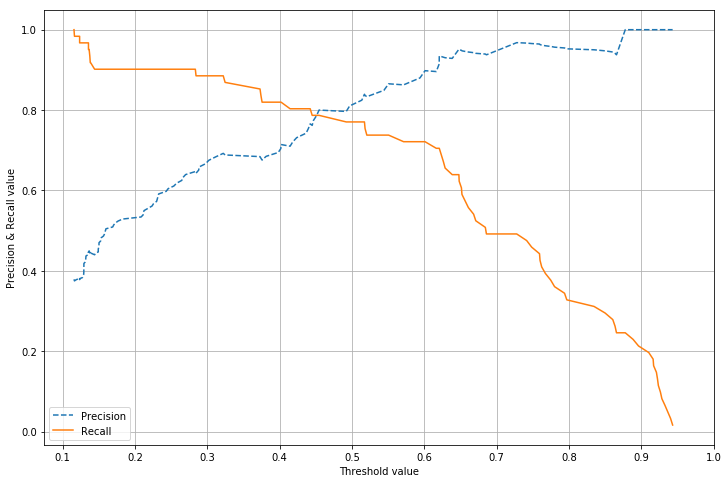

In [104]:
pre_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1]) 
#만나는 지점(threshold=약 0.45)가 가장 최적의 임곗값.(정밀도와 재현율 둘다 적절히 높아야 하므로)

- precision과 recall은 트레이드오프가 있어, 하나가 높으면 하나가 낮음.
- 그러니 지표 평가를 할 때 두 지표를 모두 고려해야 함. 어느 한쪽만 높으면 그것은 극단적인 수치 조작의 가능성이 있음. 두 지표값이 모두 적절히 높아야함!

# F1 스코어(F1 score)

- 정밀도와 재현율을 결합한 지표. 
- 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐.
- F1=2*(precision * recall)/(precision+recall)

In [105]:
#만일 A 모델의 정밀도 0.9, 재현율 0.1로 극단적 차이가 난다면 f1 스코어는
2*(0.09)/1

0.18

In [106]:
#만일 B 모델의 정밀도가 0.5, 재현율 0.5로 그닥 차이가 없다면 f1 스코어는
2*(0.25)/1

0.5

In [107]:
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))

0.8979591836734694
0.7213114754098361


In [108]:
#이렇게 위처럼 정밀도와 재현율 둘다 높은 모델의 f1 스코어는
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.8

In [110]:
#threshold를 계속 바꾸면서 평가지표를 출력해 보자.
thresholds=[0.4, 0.45, 0.5, 0.6, 0.65]

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    acc=accuracy_score(y_test,pred)
    pre=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1스코어: {3:.4f}'.format(acc, pre, recall, f1))

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for t in thresholds:
        binarizer = Binarizer(threshold=t).fit(pred_proba_c1) #학습
        custom_predict = binarizer.transform(pred_proba_c1) #예측
        print('\n임곗값: ', t)
        get_clf_eval(y_test, custom_predict)      
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds) 
#임곗값이 커질수록 P로 판단되는 것이 적어짐. 또한 precision은 높아지나 recall은 낮아짐
#왜냐, 임곗값이 작을땐 웬만해선 P로 예측.
#반대로, 임곗값이 클땐 웬만해선 N으로 예측.

#그리고 정밀도와 재현율 둘 다 적절히 높을 때의 f1 스코어가 가장 높게나옴.(여기선 0.6이지만 recall이 작아서 다른 threshold를 선택하는 게 나아보임.)


임곗값:  0.4
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1스코어: 0.7576

임곗값:  0.45
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1스코어: 0.7869

임곗값:  0.5
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1스코어: 0.7966

임곗값:  0.6
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1스코어: 0.8000

임곗값:  0.65
[[116   2]
 [ 24  37]]
정확도: 0.8547, 정밀도: 0.9487, 재현율: 0.6066, F1스코어: 0.7400


# ROC곡선(ROC Curve) & AUC값

- 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표.
- ROC곡선은 FPR(rate)가 변할 때, TPR(rate)가 어떻게 변하는지를 나타내는 곡선.(X축: FPR(1-TNR), Y축: TPR(recall))

##### fprs, tprs, thresholds = roc_curve(y_test, pred_proba의 1번 칼럼)
- FPR, TPR, 임곗값을 알려줌

In [111]:
from sklearn.metrics import roc_curve

#레이블 값이 1일 때의 예측 확률 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1) #thresholds는 자동으로 만들어짐.

thresholds.shape

(48,)

In [57]:
#반환된 임곗값 배열 로우가 48건임(shape 확인), 임곗값을 5 step으로 10건 추출
thr_index=np.arange(0, thresholds.shape[0], 5)
print('임곗값 배열의 인덱스: ', thr_index)
print('샘플용 10개의 임곗값: ',np.round(thresholds[thr_index],2))

#5 step 단위로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index],2))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index],2))
##임곗값이 1-> 0으로 작아지면서 fpr, tpr 값이 점차 커진다.
##또한 fpr이 조금씩 커질 때 tpr 급상승.

임곗값 배열의 인덱스:  [ 0  5 10 15 20 25 30 35 40 45]
샘플용 10개의 임곗값:  [1.94 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.   0.01 0.03 0.06 0.13 0.2  0.56 0.6  0.69 0.85]
샘플 임곗값별 TPR:  [0.   0.25 0.67 0.74 0.79 0.89 0.9  0.95 0.97 0.98]


In [112]:
#ROC 곡선 시각화: fpr, tpr 값
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(10,8))
    plt.plot(fprs, tprs, label='ROC') #ROC curve
    plt.plot([0,1],[0,1], 'k--', label='Random') #가운데 대각선 직선
    
    #x축 스케일 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),1))
    
    #범위, label ,legend
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

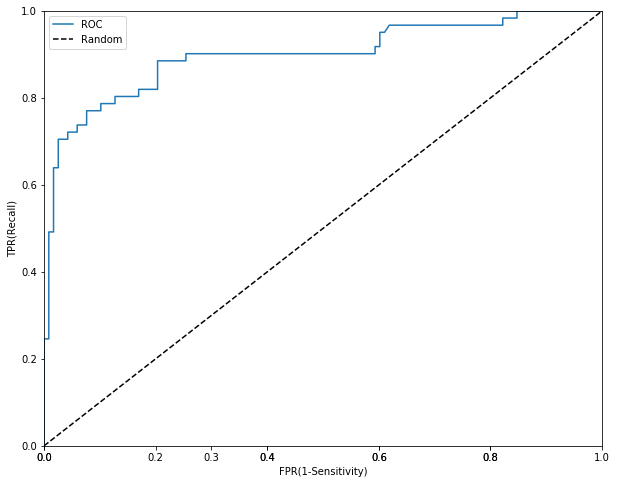

In [113]:
roc_curve_plot(y_test, pred_proba[:,1]) ## fpr이 조금씩 커질 때 tpr 급상승.

- 사실 ROC 곡선 자체는 FPR과 TPR 간 관계를 볼 때 사용하고, 직접적인 평가 지표는 ROC곡선 면적에 기반한 AUC 값임.
- AUC값은 ROC곡선 밑의 면적을 구한 것으로, 일반적으로 1에 가까울수록 좋은 수치임.
- AUC값이 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건
- 랜덤 직선의 AUC가 0.5이므로, 일반적인 분류모델의 AUC는 0.5보다는 큼.

##### roc_auc_score(y_test, pred)

In [63]:
from sklearn.metrics import roc_auc_score

pred=lr_clf.predict(X_test)
roc_score=roc_auc_score(y_test,pred)
roc_score #위 모델의 AUC는 0.84임. 꽤 1에 가까우므로 좋은 모델으로 볼수있겠음.

0.842873020283412